# COINTEGRATION

## What is cointegration? 
1. It is co-movement of two or more integrated series , i.e if one integrated series follows stochastic behaviour of another integrated series.
2. When two series seperately are non-stationary but their linear combination is stationary, then the series are said to be cointegrated.

## Why do we need cointegration?
1. Since non-stationary series are highly correlated and give us crazy results we take linear combination of all such non-stationary series and the linear combination turns out to be stationary

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#### Loading the data

In [12]:
# Get the data
x = pd.read_csv("datasets/x.txt",index_col=0)['Adj Close']
y = pd.read_csv("datasets/y.txt",index_col=0)['Adj Close']    
df = pd.concat([y,x],axis=1)
df.columns = ['Y','X']
df.head()

,Y,X
Date,,
02-01-2015,27.024069,19.254818
05-01-2015,26.298779,19.071854
06-01-2015,25.912586,18.993441
07-01-2015,25.940847,19.167692
08-01-2015,26.261103,19.420359


In [15]:
len(df)

755

#### Plotting X & Y

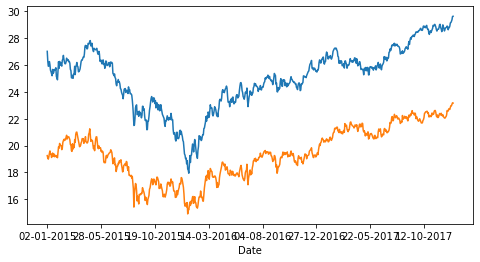

In [5]:
df.Y.plot(label='Y',figsize=(8,4))
df.X.plot(label='X',figsize=(8,4))
plt.show()

#### Observation:
Graphs of both timeseries looks like co-related, but we cannot assume that they are cointegrated. For that we have to test for stationarity using ADF test

#### Performing ADF test on X & Y to check for stationarity

In [20]:
# To perform ADF Test on X
X = df.X
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.060147
p-value: 0.730700
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [21]:
# To perform ADF Test on Y
Y = df.Y
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.911495
p-value: 0.784163
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


#### Observation:
Both X and Y are non-stationary. 

#### Plotting scatter plot of X&Y to observe if they have linear trend

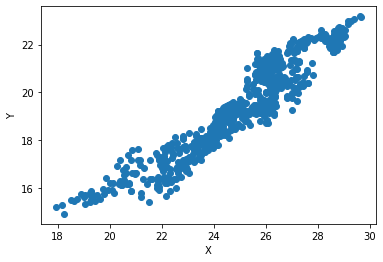

In [6]:
plt.scatter(df.Y,df.X)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Observation:
The timeseries data shows a linear trend. 

#### Hedge Ratio

In [25]:
#Hedge Ratio (Linear regression between both timeseries)
X = df.X.iloc[:90]
Y = df.Y.iloc[:90]
model = sm.OLS(Y,X).fit() 
Hedge_ratio = model.params[0]
print("Hedge ratio =" , Hedge_ratio)

Hedge ratio = 1.3078067762939307


#### Spread

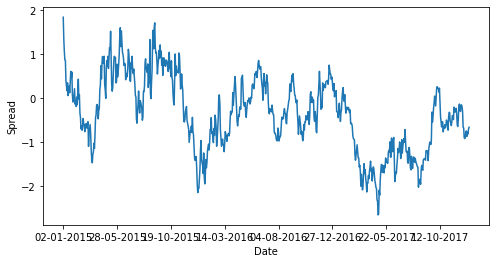

In [26]:
#Spread = Y - Hedge ratio * X
df['spread'] = df.Y - Hedge_ratio * df.X

# Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

### Observation:
The graph looks like it is mean centered which implies it is stationary. Still we do ADF test to confirm our hypothesis.

#### Stationarity test on Spread 

In [18]:
# To perform ADF Test
result = adfuller(df.spread)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.117853
p-value: 0.000905
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


### Observation:
1. X & Y were non-stationary but linear combination of X & Y is stationary. Which implies that timeseries X and Y are cointegrated. 
2. Since the p-value < 0.05 , the spread is stationary.